In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [149]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [150]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [151]:
data.shape

(7920, 3)

In [152]:
data.duplicated().sum()

np.int64(0)

In [153]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [154]:
 import re
import string

In [155]:
data["tweet"] = data["tweet"].apply(lambda x: "".join(x.lower() for x in x.split()))

In [156]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [157]:
data["tweet"].head(5)

0    #fingerprint#pregnancytesthttps://goo.gl/h1mfq...
1    finallyatransparantsiliconcase^^thankstomyuncl...
2    welovethis!wouldyougo?#talk#makememories#unplu...
3    i'mwirediknowi'mgeorgeiwasmadethatway;)#iphone...
4    whatamazingservice!applewon'teventalktomeabout...
Name: tweet, dtype: object

remove links

In [158]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [159]:
data["tweet"].head(5)

0    #fingerprint#pregnancytesthttps://goo.gl/h1mfq...
1    finallyatransparantsiliconcase^^thankstomyuncl...
2    welovethis!wouldyougo?#talk#makememories#unplu...
3    i'mwirediknowi'mgeorgeiwasmadethatway;)#iphone...
4    whatamazingservice!applewon'teventalktomeabout...
Name: tweet, dtype: object

  remove punctuations

In [160]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["tweet"] = data["tweet"].apply(remove_punctuations)

In [161]:
data["tweet"] = data['tweet'].str.replace('\\d+', '', regex=True)

In [162]:
data["tweet"].tail(10)

7910    perfectmatchinstagoodapplewatchredinstagramiph...
7911    iamcompletelyinlovewiththenewiphoneemojisiphon...
7912    tuneinturnondropoutgtdinoneapphttpbitlycebfmob...
7913    oksomygalaxycrashedafteronedaynowihavetowaitti...
7914    gainfollowersrtthismustfollowmeifollowbackfoll...
7915    liveoutloudlolliveoutloudselfiesmilesonymusich...
7916    wewouldliketowishyouanamazingdaymakeeveryminut...
7917    helpingmylovelyyearoldneighborwithheripadthism...
7918    finallygotmysmartpocketwifistayconnectedanytim...
7919    applebarcelonaapplestorebcnbarcelonatravelipho...
Name: tweet, dtype: object

remove stopwords

In [163]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [164]:
import nltk

In [165]:
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [166]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [167]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [168]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [169]:
data["tweet"].head()

0    fingerprintpregnancytesthttpsgooglhmfqvandroid...
1    finallyatransparantsiliconcasethankstomyuncley...
2    welovethiswouldyougotalkmakememoriesunplugrela...
3    imwirediknowimgeorgeiwasmadethatwayiphonecuted...
4    whatamazingserviceapplewonteventalktomeaboutaq...
Name: tweet, dtype: object

In [170]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [171]:
data["tweet"].head()

0    fingerprintpregnancytesthttpsgooglhmfqvandroid...
1    finallyatransparantsiliconcasethankstomyuncley...
2    welovethiswouldyougotalkmakememoriesunplugrela...
3    imwirediknowimgeorgeiwasmadethatwayiphonecuted...
4    whatamazingserviceapplewonteventalktomeaboutaq...
Name: tweet, dtype: object

In [172]:
data

,id,label,tweet
0,1,0,fingerprintpregnancytesthttpsgooglhmfqvandroid...
1,2,0,finallyatransparantsiliconcasethankstomyuncley...
2,3,0,welovethiswouldyougotalkmakememoriesunplugrela...
3,4,0,imwirediknowimgeorgeiwasmadethatwayiphonecuted...
4,5,1,whatamazingserviceapplewonteventalktomeaboutaq...
...,...,...,...
7915,7916,0,liveoutloudlolliveoutloudselfiesmilesonymusich...
7916,7917,0,wewouldliketowishyouanamazingdaymakeeveryminut...
7917,7918,0,helpingmylovelyyearoldneighborwithheripadthism...
7918,7919,0,finallygotmysmartpocketwifistayconnectedanytim...


Building vacabulary

In [173]:
from collections import Counter
vocab = Counter()

In [174]:
vocab

Counter()

In [175]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [176]:
len(vocab)

7796

In [177]:
tokens = [key for key in vocab if vocab[key] > 10]

In [178]:
tokens

['wewouldliketowishyouanamazingdaymakeeveryminutecounttlstodayiphoneaccessoriesnewslifemayatam']

In [179]:
len(tokens)

1

In [180]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding = "utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

###Devide data set

In [181]:
x = data['tweet']
y = data['label']

In [182]:
y

0       0
1       0
2       0
3       0
4       1
       ..
7915    0
7916    0
7917    0
7918    0
7919    0
Name: label, Length: 7920, dtype: int64

In [183]:
x

0       fingerprintpregnancytesthttpsgooglhmfqvandroid...
1       finallyatransparantsiliconcasethankstomyuncley...
2       welovethiswouldyougotalkmakememoriesunplugrela...
3       imwirediknowimgeorgeiwasmadethatwayiphonecuted...
4       whatamazingserviceapplewonteventalktomeaboutaq...
                              ...                        
7915    liveoutloudlolliveoutloudselfiesmilesonymusich...
7916    wewouldliketowishyouanamazingdaymakeeveryminut...
7917    helpingmylovelyyearoldneighborwithheripadthism...
7918    finallygotmysmartpocketwifistayconnectedanytim...
7919    applebarcelonaapplestorebcnbarcelonatravelipho...
Name: tweet, Length: 7920, dtype: object

In [184]:
pip install scikit-learn 

Note: you may need to restart the kernel to use updated packages.


In [185]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(x, y, test_size = 0.2)

In [186]:
X_train.shape

(6336,)

In [187]:
X_test.shape

(1584,)

In [188]:
y_test

1756    1
6900    0
3820    0
3823    0
5533    0
       ..
5067    0
1043    0
2863    0
472     0
7410    0
Name: label, Length: 1584, dtype: int64

In [189]:
X_train

5953         omfgmyapplechargerthatapplesenttomewasbroken
849     bighopetoallahpraylifehopesamsunginstagramface...
1492    myipodcantconnecttoitunesmusicapparentlytodown...
6605    photoinstagramdrunkjunkiefollowfollowmenightni...
5115    amacisforwhenitsrainingonlyappleproductsbigtim...
                              ...                        
1494    ilovedsamsungqueenuniqueinstapicprettyfashiong...
5418    appleisevidentlyteachingberniesanderssupporter...
3116    ahhhalliwanttodoissaveallmyphotosonthecloudsom...
4855    fisheyelensthankyouinstaxonlinephlenslikeiphon...
2919    buyingphonecasesisabitofanobsessioniphonecases...
Name: tweet, Length: 6336, dtype: object

In [190]:
X_test

1756         diditellyouihateappleiphonebatterieswellthey
6900    jaylinmakingsomesandartkidsfamilybwbwloverblac...
3820    fedupwithourolddriversowegotthebestbackseatdri...
3823    gainfollowersrtthismustfollowmeifollowbackfoll...
5533    mywholefamilyisteamiphoneexceptmeandmymommatea...
                              ...                        
5067    newphonecoveriphonecaseiphonecasenewprettybrit...
1043    pcsexquisitesquishyrandomcharminhttpebaytoyimr...
2863    gainfollowersrtthismustfollowmeifollowbackfoll...
472     meetsonysnewestemployeesonynewjobsmileselectro...
7410    sammendeswon’tdirectthenext…httpdlvritlqkvmzne...
Name: tweet, Length: 1584, dtype: object

Vectorization

In [191]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []

    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))

        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1

        vectorized_lst.append(sentence_lst)

    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)

    return vectorized_lst_new

In [192]:
vectorized_x_train = vectorizer(X_train, tokens)

In [193]:
vectorized_x_test = vectorizer(X_test, tokens)

In [194]:
vectorized_x_train

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [195]:
y_train

5953    1
849     0
1492    1
6605    0
5115    1
       ..
1494    0
5418    1
3116    1
4855    0
2919    0
Name: label, Length: 6336, dtype: int64

In [196]:
vectorized_x_test

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [197]:
y_test

1756    1
6900    0
3820    0
3823    0
5533    0
       ..
5067    0
1043    0
2863    0
472     0
7410    0
Name: label, Length: 1584, dtype: int64

In [198]:
y_train.value_counts()

label
0    4722
1    1614
Name: count, dtype: int64

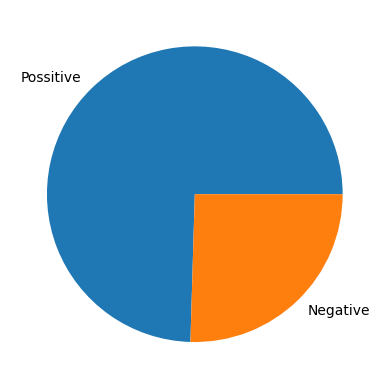

In [199]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]),labels=['Possitive', 'Negative'])
plt.show()

Handle imbalanced dataset

In [200]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9444, 1) (9444,)


/Users/kavindu/Desktop/sentiment_analysis_project/env/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/kavindu/Desktop/sentiment_analysis_project/env/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [201]:
!pip install imbalanced.learn

In [202]:
y_train_smote.value_counts()

label
1    4722
0    4722
Name: count, dtype: int64

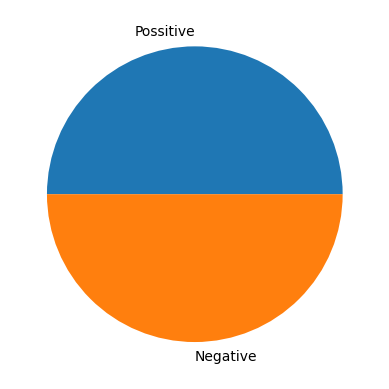

In [203]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]),labels=['Possitive', 'Negative'])
plt.show()

In [204]:
vectorized_x_train_smote

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [205]:
y_train_smote

0       1
1       0
2       1
3       0
4       1
       ..
9439    1
9440    1
9441    1
9442    1
9443    1
Name: label, Length: 9444, dtype: int64

In [206]:
vectorized_x_test

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [207]:
y_test

1756    1
6900    0
3820    0
3823    0
5533    0
       ..
5067    0
1043    0
2863    0
472     0
7410    0
Name: label, Length: 1584, dtype: int64

end of prepossesing

Model traonong and evoluation

In [208]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [209]:
def training_scores(y_act, y_pred):
    # Calculate the training scores
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

def validation_scores(y_act, y_pred):
    # Calculate the validation scores
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

Logistic regression

In [210]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred=lr.predict(vectorized_x_train_smote)

y_test_pred=lr.predict(vectorized_x_test)

training_scores(y_train_smote,y_train_pred)

validation_scores(y_test,y_test_pred)

Training Scores:
	Accuracy = 0.501
	Precision = 0.5
	Recall = 1.0
	F1-Score = 0.667
Testing Scores:
	Accuracy = 0.261
	Precision = 0.26
	Recall = 1.0
	F1-Score = 0.413


Nalve Bayes

In [211]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred=mnb.predict(vectorized_x_train_smote)

y_test_pred=mnb.predict(vectorized_x_test)

training_scores(y_train_smote,y_train_pred)

validation_scores(y_test,y_test_pred)

Training Scores:
	Accuracy = 0.5
	Precision = 0.0
	Recall = 0.0
	F1-Score = 0.0
Testing Scores:
	Accuracy = 0.74
	Precision = 0.0
	Recall = 0.0
	F1-Score = 0.0


/Users/kavindu/Desktop/sentiment_analysis_project/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/kavindu/Desktop/sentiment_analysis_project/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Decision tree

In [212]:
dt = DecisionTreeClassifier()

dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred=dt.predict(vectorized_x_train_smote)

y_test_pred=dt.predict(vectorized_x_test)

training_scores(y_train_smote,y_train_pred)

validation_scores(y_test,y_test_pred)

Training Scores:
	Accuracy = 0.501
	Precision = 0.5
	Recall = 1.0
	F1-Score = 0.667
Testing Scores:
	Accuracy = 0.261
	Precision = 0.26
	Recall = 1.0
	F1-Score = 0.413


Random Forest

In [214]:
rf = RandomForestClassifier()

rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred=rf.predict(vectorized_x_train_smote)

y_test_pred=rf.predict(vectorized_x_test)

training_scores(y_train_smote,y_train_pred)

validation_scores(y_test,y_test_pred)

Training Scores:
	Accuracy = 0.501
	Precision = 0.5
	Recall = 1.0
	F1-Score = 0.667
Testing Scores:
	Accuracy = 0.261
	Precision = 0.26
	Recall = 1.0
	F1-Score = 0.413


Support Vector Machine

In [217]:
svm = SVC()

svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred=svm.predict(vectorized_x_train_smote)

y_test_pred=svm.predict(vectorized_x_test)

training_scores(y_train_smote,y_train_pred)

validation_scores(y_test,y_test_pred)

Training Scores:
	Accuracy = 0.501
	Precision = 0.5
	Recall = 1.0
	F1-Score = 0.667
Testing Scores:
	Accuracy = 0.261
	Precision = 0.26
	Recall = 1.0
	F1-Score = 0.413


In [218]:
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)